In [17]:
import import_ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [18]:
import EDA_Amazon as eda

In [19]:
import pandas as pd

top_reviewed_per_category = (
    eda.df.groupby("category")
    .apply(lambda x: x.nlargest(10, "rating_count"))
    .reset_index(drop=True)
)

print(top_reviewed_per_category)

     product_id                                       product_name  \
0    B0912WJ87V  Reffair AX30 [MAX] Portable Air Purifier for C...   
1    B097C564GC  rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
2    B094DQWV9B  Kanget [2 Pack] Type C Female to USB A Male Ch...   
3    B009LJ2BXA  Hp Wired On Ear Headphones With Mic With 3.5 M...   
4    B08SCCG9D4  JBL Commercial CSLM20B Auxiliary Omnidirection...   
..          ...                                                ...   
815  B00LOD70SC  Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
816  B07SBGFDX9     Pentonic Multicolor Ball Point Pen, Pack of 10   
817  B00LZPQVMK  Parker Vector Standard Chrome Trim Ball Pen (I...   
818  B0746N6WML  Parker Vector Camouflage Gift Set - Roller Bal...   
819  B00DJ5N9VK  Faber-Castell Connector Pen Set - Pack of 25 (...   

                                              category  discounted_price  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...            2339.0   
1    Co

<Axes: >

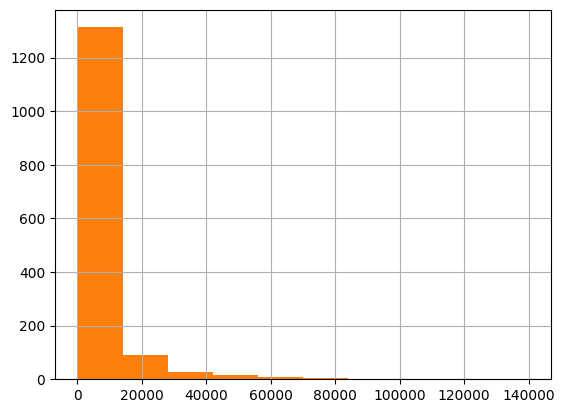

In [20]:
import pandas as pd

# Create histograms
eda.df["discounted_price"].hist(label="Discounted Price")
eda.df["actual_price"].hist(label="Actual Price")

# Calculate and analyze discount percentages
eda.df["discount_percentage"] = (eda.df["actual_price"] - eda.df["discounted_price"]) / eda.df["actual_price"] * 100
eda.df["discount_percentage"].describe()
eda.df["discount_percentage"].hist(label="Discount Percentage")

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    41.525000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.387733
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.035035
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.335120
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.719582
                                                                                                                            ...    
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.000000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Wr

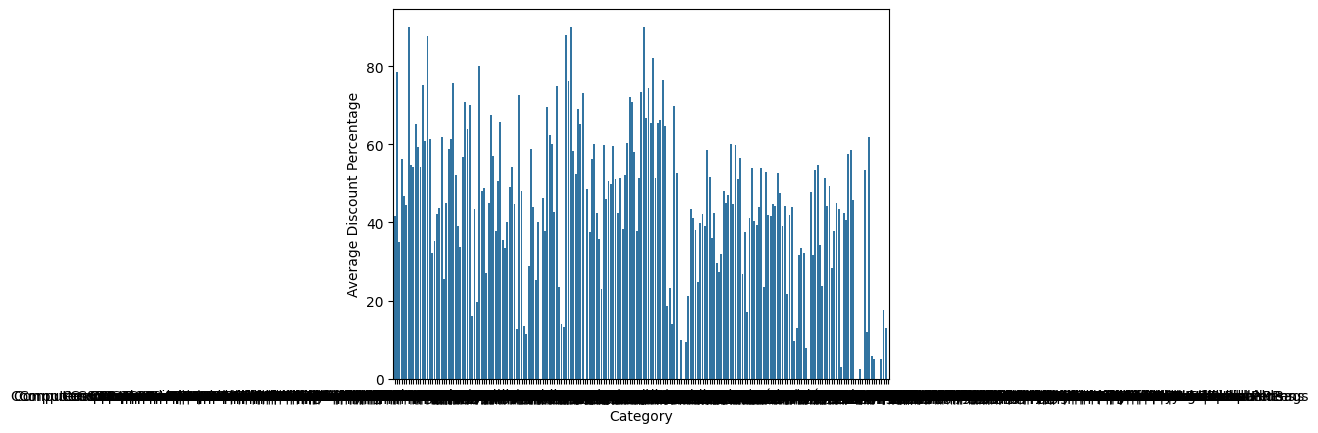

In [21]:
# Calculate average discount percentage per category
avg_discount_per_category = eda.df.groupby('category')['discount_percentage'].mean()

# Display results
print(avg_discount_per_category)

# Optional: Visualization
sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values)
plt.xlabel("Category")
plt.ylabel("Average Discount Percentage")
plt.show()

In [22]:
# Count occurrences of product names
product_counts = eda.df["product_name"].value_counts()

# Sort in descending order and display top results
print(product_counts.sort_values(ascending=False).head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                           3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                      3
boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)                                                                                                                             

In [23]:
def extract_keywords(product_name):
  """Extracts keywords from a product name, handling potential numbers."""
  if isinstance(product_name, str):  # Check if it's a string
    keywords = product_name.lower().split()  # Split into words and lowercase
    keywords = [word for word in keywords if word.isalpha()]  # Remove non-alphabetical characters
  else:
    keywords = []  # Handle non-string values (e.g., integers) by returning an empty list
  return keywords

# Apply the function to extract keywords
eda.df["keywords"] = eda.df["product_name"].apply(extract_keywords)

# Flatten the list of keywords
all_keywords = [keyword for keywords in eda.df["keywords"] for keyword in keywords]

# Count keyword occurrences
keyword_counts = pd.Series(all_keywords).value_counts()

# Display the top 10 most popular keywords
print(keyword_counts.head(10))

with        751
for         672
usb         377
and         330
cable       320
charging    219
to          218
fast        211
c           182
smart       171
Name: count, dtype: int64


In [24]:
from textblob import TextBlob  # Import TextBlob library
# Select review column
eda.df[["product_id", "user_id", "review_content"]]

# Calculate sentiment score for each review
eda.df["sentiment"] = eda.df["review_content"].apply(lambda text: TextBlob(text).sentiment.polarity)

# Sort by sentiment score (ascending for positive)
eda.df_sorted = eda.df.sort_values(by="sentiment", ascending=True)

# Display top reviews based on a desired number (e.g., top 10)
top_reviews = eda.df_sorted.head(10)
print(top_reviews)

      product_id                                       product_name  \
155   B09XJ1LM7R  7SEVEN® Compatible for Tata Sky Remote Origina...   
1237  B0B7NWGXS6  Havells Bero Quartz Heater Black 800w 2 Heat S...   
145   B00RFWNJMC  Airtel DigitalTV DTH Remote SD/HD/HD Recording...   
723   B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
152   B08PV1X771  Samsung 80 cm (32 inches) Wondertainment Serie...   
22    B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1198  B09SPTNG58  Crompton Sea Sapphira 1200 mm Ultra High Speed...   
738   B08MZQBFLN  Callas Multipurpose Foldable Laptop Table with...   
1367  B07LG96SDB  ESN 999 Supreme Quality 1500W Immersion Water ...   

                                               category  discounted_price  \
155   Electronics|HomeTheater,TV&Video|Accessories|R...             399.0   
1237  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...         

In [25]:
# Calculate the correlation coefficient
correlation_coefficient = eda.df["discounted_price"].corr(eda.df["rating"])

# Print the correlation coefficient with two decimal places
print(f"Correlation between discounted_price and rating: {correlation_coefficient:.2f}")

Correlation between discounted_price and rating: 0.12


In [26]:
# Group data by category and calculate average rating
average_ratings = eda.df.groupby("category")["rating"].mean().reset_index()

# Sort by average rating in descending order
average_ratings = average_ratings.sort_values(by="rating", ascending=False)

# Print the top 5 categories
print("Top 5 categories with highest average ratings:")
for i in range(5):
    category = average_ratings.iloc[i]["category"]
    average_rating = average_ratings.iloc[i]["rating"]
    print(f"{i+1}. {category}: {average_rating:.2f}")

Top 5 categories with highest average ratings:
1. Computers&Accessories|Tablets: 4.60
2. Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters: 4.50
3. Electronics|Cameras&Photography|Accessories|Film: 4.50
4. Computers&Accessories|Components|Memory: 4.50
5. Electronics|HomeAudio|MediaStreamingDevices|StreamingClients: 4.50
